In [82]:
import pandas as pd
%pylab inline
import seaborn as sns
sns.set_style("white")
sns.despine()
sns.set_context("paper")

Populating the interactive namespace from numpy and matplotlib


In [45]:
d101 = pd.read_csv('./June29outs/1_0_1_outs/all_PMs_1_0.dat',sep=' ', names=['Num', 'SNP', 'abundancy'])
d111 = pd.read_csv('./June29outs/1_1_1_outs/all_PMs_1_0.dat', sep=' ', names=['Num', 'SNP', 'abundancy'])

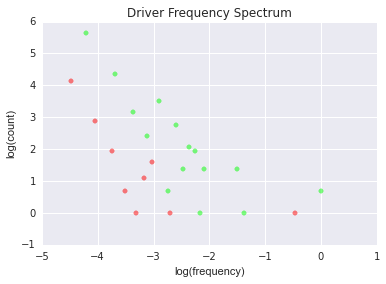

In [63]:
y1,x1 = np.histogram(d111.abundancy, bins=100)
y2,x2 = np.histogram(d101.abundancy, bins=100)
def neighbour_iterator(arr):
    index = 0
    while index < len(arr)-1:
        yield (arr[index], arr[index+1])
        index += 1
x1_meaned = np.mean(np.array(list(neighbour_iterator(x1))), axis=1)
x2_meaned = np.mean(np.array(list(neighbour_iterator(x2))), axis=1)
y1_keep = y1!=0
y2_keep = y2!=0

x1_plt = np.log(x1_meaned[y1_keep])
x2_plt = np.log(x2_meaned[y2_keep])
y1_plt = np.log(y1[y1_keep])
y2_plt = np.log(y2[y2_keep])

plt.title('Driver Frequency Spectrum')
plt.scatter(x1_plt,y1_plt,color=(1,0,0,0.5))
plt.scatter(x2_plt,y2_plt,color=(0,1,0,0.5))
plt.xlabel('log(frequency)')
plt.ylabel('log(count)')

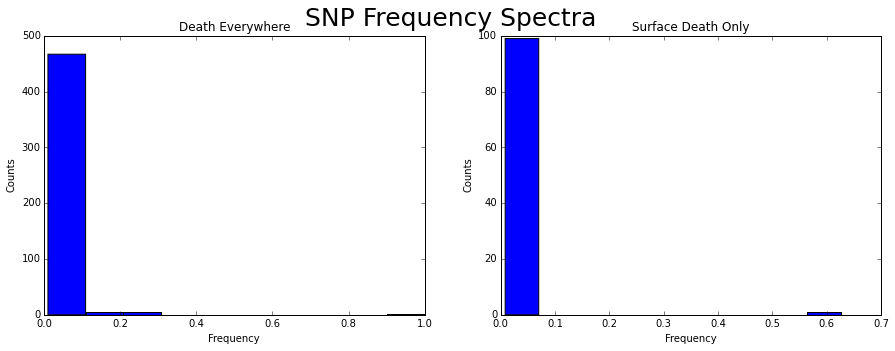

In [25]:
plt.figure(figsize=(15,5))
plt.suptitle('SNP Frequency Spectra',fontsize=25)
plt.subplot(1,2,1)
plt.title('Death Everywhere')
plt.hist(d101.abundancy.values)
plt.xlabel('Frequency')
plt.ylabel('Counts')
plt.subplot(1,2,2)
plt.title('Surface Death Only')
plt.hist(d111.abundancy.values)
plt.xlabel('Frequency')
plt.ylabel('Counts')

In [64]:
d101 = pd.read_csv('./June29outs/1_0_1_outs/drv_PMs_1_0.dat',sep=' ', names=['Num', 'SNP', 'abundancy'])
d111 = pd.read_csv('./June29outs/1_1_1_outs/drv_PMs_1_0.dat', sep=' ', names=['Num', 'SNP', 'abundancy'])

In [30]:
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


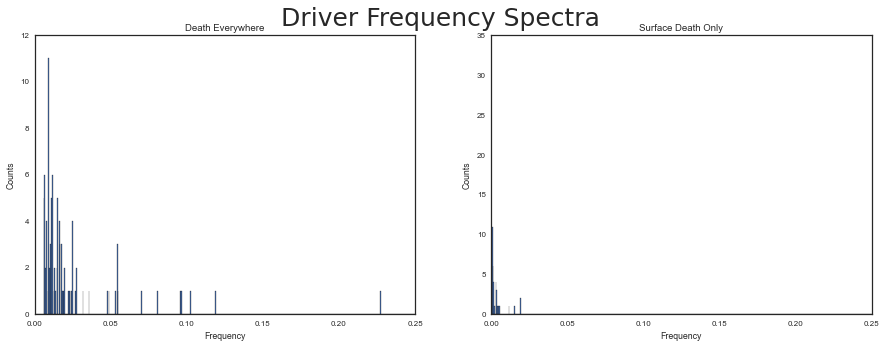

In [98]:
plt.figure(figsize=(15,5))
plt.suptitle('Driver Frequency Spectra',fontsize=25)
plt.subplot(1,2,1)
plt.title('Death Everywhere')
plt.hist(d101.abundancy.values,bins=np.linspace(0,0.25,num=500))
plt.xlabel('Frequency')
plt.ylabel('Counts')
plt.subplot(1,2,2)
plt.title('Surface Death Only')
plt.hist(d111.abundancy.values, bins=np.linspace(0,0.25,num=500))
plt.xlabel('Frequency')
plt.ylabel('Counts')

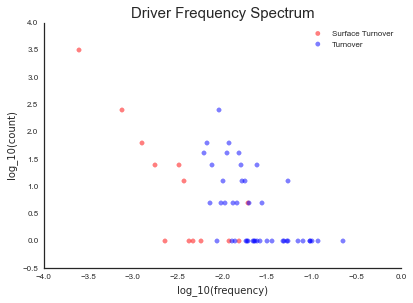

In [116]:
# plt.figure(figsize=(5,5.5))
plt.figure()
y1,x1 = np.histogram(d111.abundancy, bins=np.linspace(0,0.25,num=500))
y2,x2 = np.histogram(d101.abundancy, bins=np.linspace(0,0.25,num=500))
def neighbour_iterator(arr):
    index = 0
    while index < len(arr)-1:
        yield (arr[index], arr[index+1])
        index += 1
x1_meaned = np.mean(np.array(list(neighbour_iterator(x1))), axis=1)
x2_meaned = np.mean(np.array(list(neighbour_iterator(x2))), axis=1)
y1_keep = y1!=0
y2_keep = y2!=0

x1_plt = np.log10(x1_meaned[y1_keep])
x2_plt = np.log10(x2_meaned[y2_keep])
# x1_plt = x1_meaned[y1_keep]
# x2_plt = x2_meaned[y2_keep]
y1_plt = np.log(y1[y1_keep])
y2_plt = np.log(y2[y2_keep])

plt.title('Driver Frequency Spectrum',fontsize=15)
plt.scatter(x1_plt,y1_plt,color=(1,0,0,0.5), label='Surface Turnover')
plt.scatter(x2_plt,y2_plt,color=(0,0,1,0.5), label='Turnover')
# plt.xlabel(r'$log_{10}(\textbf{frequency})$')
# plt.ylabel(r'$log_{10}(\textbf{count})$')
plt.xlabel('log_10(frequency)',fontsize=10)
plt.ylabel('log_10(count)',fontsize=10)
plt.legend()
sns.despine()
plt.savefig('test.pdf', dpi=300)
plt.savefig('test.svg', dpi=300)
plt.savefig('test.png', dpi=300)